In [7]:
import pandas as pd 
import numpy as np 

path = './vgsales/vgsales.csv'
dataframe = pd.read_csv(path)
print(dataframe.head())
print(dataframe.columns)
print(len(dataframe.index))

   Rank                      Name Platform  ...  JP_Sales Other_Sales Global_Sales
0     1                Wii Sports      Wii  ...      3.77        8.46        82.74
1     2         Super Mario Bros.      NES  ...      6.81        0.77        40.24
2     3            Mario Kart Wii      Wii  ...      3.79        3.31        35.82
3     4         Wii Sports Resort      Wii  ...      3.28        2.96        33.00
4     5  Pokemon Red/Pokemon Blue       GB  ...     10.22        1.00        31.37

[5 rows x 11 columns]
Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')
16598


In [15]:
dataframe = dataframe.dropna()
for index in dataframe.columns:
    print(dataframe[index].describe())
    print()

count    16291.000000
mean      8290.190228
std       4792.654450
min          1.000000
25%       4132.500000
50%       8292.000000
75%      12439.500000
max      16600.000000
Name: Rank, dtype: float64

count                           16291
unique                          11325
top       Need for Speed: Most Wanted
freq                               12
Name: Name, dtype: object

count     16291
unique       31
top          DS
freq       2131
Name: Platform, dtype: object

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

count      16291
unique        12
top       Action
freq        3251
Name: Genre, dtype: object

count               16291
unique                576
top       Electronic Arts
freq                 1339
Name: Publisher, dtype: object

count    16291.000000
mean         0.265647
std          0.822432
min          0.00000

In [16]:
#popular analysis
global_sales = dataframe['Global_Sales'].values
threhold = np.percentile(global_sales,75)
print(threhold)

0.48


In [23]:
na_sales = dataframe['NA_Sales'].values
na_threhold = np.percentile(na_sales,75)
eu_sales = dataframe['EU_Sales'].values
eu_threhold = np.percentile(eu_sales,75)
jp_sales = dataframe['JP_Sales'].values
jp_threhold = np.percentile(jp_sales,75)

import matplotlib.pyplot as plt 


Action          0.199558
Sports          0.141428
Misc            0.103493
Role-Playing    0.090234
Shooter         0.078694
Name: Genre, dtype: float64


<AxesSubplot:title={'center':'Game Genre'}>

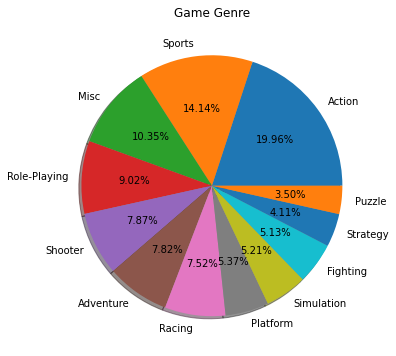

In [34]:
genre = dataframe['Genre'].value_counts()/sum(dataframe['Genre'].value_counts())
print(genre[:5])

genre.plot.pie(title='Game Genre',autopct='%.2f%%',figsize=(6,6),ylabel='',shadow=True)

<AxesSubplot:title={'center':'Popular Game Genre'}>

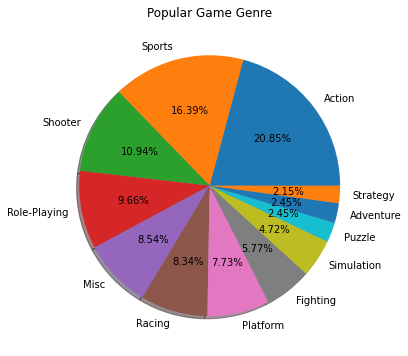

In [50]:
popular_data = dataframe.loc[dataframe['Global_Sales'] >= threhold,:]
popular_genre_data = popular_data['Genre']
popular_genre = popular_genre_data.value_counts()/sum(popular_genre_data.value_counts())
#print(popular_genre)

popular_genre.plot.pie(title='Popular Game Genre',autopct='%.2f%%',figsize=(6,6),ylabel='',shadow=True)



Action          0.008908
Adventure      -0.053735
Fighting        0.006427
Misc           -0.018100
Platform        0.023608
Puzzle         -0.010521
Racing          0.008240
Role-Playing    0.006414
Shooter         0.030677
Simulation     -0.004830
Sports          0.022507
Strategy       -0.019595
Name: Genre, dtype: float64


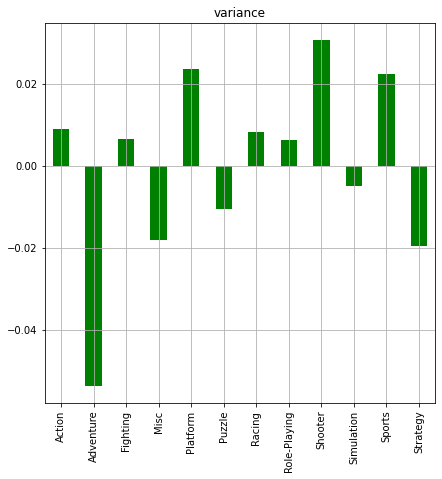

In [51]:
#diff
diff_genre = popular_genre - genre
diff_genre.plot.bar(title='variance',figsize=(7,7),color='g',grid=True)
print(diff_genre)

In [52]:
pd.crosstab(index=popular_data.Genre,columns=popular_data.Platform,margins=True,margins_name='Total')

Platform,2600,3DS,DC,DS,GB,GBA,GC,GEN,N64,NES,PC,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,WS,Wii,WiiU,X360,XB,XOne,Total
Genre,,,,,,,,,,,,,,,,,,,,,,,,,,,
Action,18,29,1,51,3,33,19,1,13,12,21,50,128,148,38,33,8,0,0,4,0,66,14,117,26,19,852
Adventure,0,2,1,26,4,8,2,0,0,1,4,11,4,9,2,2,1,2,0,2,0,9,0,7,1,2,100
Fighting,1,2,0,4,0,2,7,3,12,3,0,39,46,38,5,13,1,3,0,10,0,8,2,26,10,1,236
Misc,3,6,0,49,7,17,8,0,5,2,4,28,55,25,3,4,1,0,0,1,0,80,6,37,4,4,349
Platform,9,10,1,21,12,38,12,5,13,28,0,25,45,18,4,7,2,0,1,14,0,24,10,10,7,0,316
Puzzle,6,3,0,30,10,7,3,0,1,10,0,7,4,0,0,3,0,1,0,5,0,9,1,0,0,0,100
Racing,2,3,1,10,2,8,12,0,16,4,0,52,73,38,6,22,2,2,0,3,0,22,2,39,16,6,341
Role-Playing,0,30,0,46,13,22,7,0,1,10,21,47,45,44,11,20,4,0,0,20,1,8,2,32,6,5,395
Shooter,16,1,0,6,1,0,6,0,5,7,24,23,59,87,22,13,4,1,0,2,0,17,1,90,40,22,447


In [69]:
popular_data_on_top_genre = popular_data.loc[(popular_data['Genre']== 'Action') | (popular_data['Genre']== 'Sports') |  (popular_data['Genre']== 'Shooter'),:]
top_genre_name = popular_data_on_top_genre['Name']
top_genre_name_count = top_genre_name.value_counts()

print(top_genre_name_count[:15])
print()
top_genre_publisher = popular_data_on_top_genre['Publisher']
top_genre_publisher_count = top_genre_publisher.value_counts()
print(top_genre_publisher_count[:15])

LEGO Marvel Super Heroes                       8
The LEGO Movie Videogame                       6
FIFA Soccer 11                                 6
FIFA Soccer 10                                 6
LEGO Jurassic World                            6
Spider-Man 2                                   6
FIFA Soccer 08                                 6
FIFA 15                                        6
Iron Man                                       6
The Simpsons Game                              6
Madden NFL 07                                  6
Star Wars: The Force Unleashed                 6
Madden NFL 08                                  5
Call of Duty: Ghosts                           5
LEGO Indiana Jones: The Original Adventures    5
Name: Name, dtype: int64

Electronic Arts                           451
Activision                                218
Take-Two Interactive                      132
Ubisoft                                   124
Sony Computer Entertainment               107
Nintendo 

DS      0.130808
PS2     0.130563
PS3     0.080044
Wii     0.079185
X360    0.075747
Name: Platform, dtype: float64


<AxesSubplot:title={'center':'Game Platform'}>

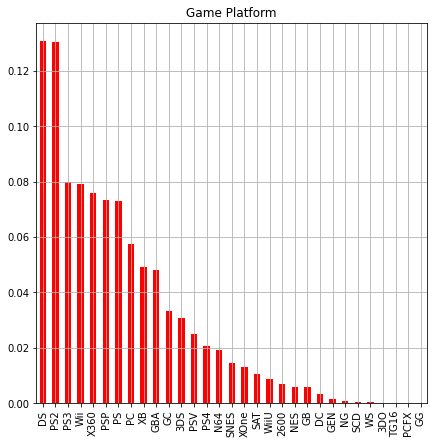

In [42]:
platform = dataframe['Platform'].value_counts()/sum(dataframe['Platform'].value_counts())
print(platform[:5])


platform.plot.bar(title='Game Platform',figsize=(7,7),grid=True,color='r')

PS2     0.155860
PS3     0.121116
X360    0.111329
PS      0.094935
Wii     0.082946
Name: Platform, dtype: float64


<AxesSubplot:title={'center':'Popular Game Platform'}>

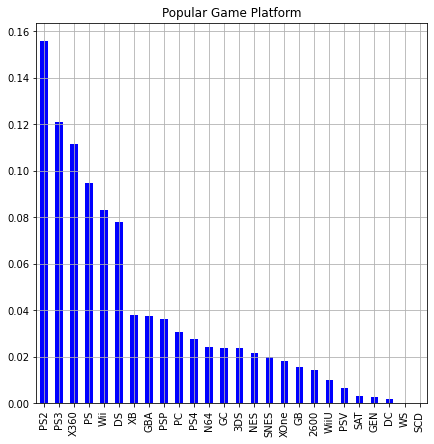

In [70]:
popular_platform_data = popular_data['Platform']
popular_platform  = popular_platform_data.value_counts()/sum(popular_platform_data.value_counts())

print(popular_platform[:5])
popular_platform.plot.bar(title='Popular Game Platform',figsize=(7,7),grid=True,color='b')

2600    0.007071
3DO          NaN
3DS    -0.006897
DC     -0.001479
DS     -0.053001
GB      0.009461
GBA    -0.010812
GC     -0.009291
GEN     0.001034
GG           NaN
N64     0.004826
NES     0.015761
NG           NaN
PC     -0.026748
PCFX         NaN
PS      0.021950
PS2     0.025297
PS3     0.041072
PS4     0.007024
PSP    -0.037264
PSV    -0.018561
SAT    -0.007683
SCD    -0.000124
SNES    0.005148
TG16         NaN
WS     -0.000124
Wii     0.003761
WiiU    0.001254
X360    0.035581
XB     -0.011121
XOne    0.005031
Name: Platform, dtype: float64


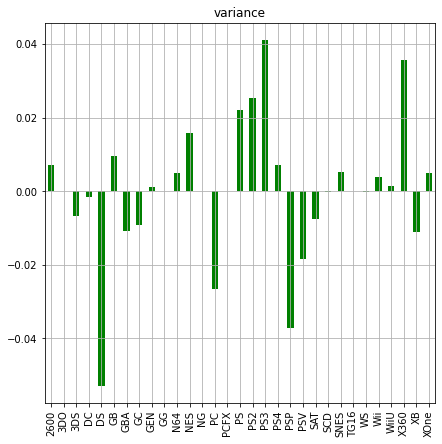

In [76]:
diff_platform = popular_platform - platform
diff_platform.plot.bar(title='variance',figsize=(7,7),color='g',grid=True)
print(diff_platform)

Electronic Arts                 0.082193
Activision                      0.059297
Namco Bandai Games              0.056964
Ubisoft                         0.056350
Konami Digital Entertainment    0.050519
Name: Publisher, dtype: float64


<AxesSubplot:title={'center':'Publisher'}>

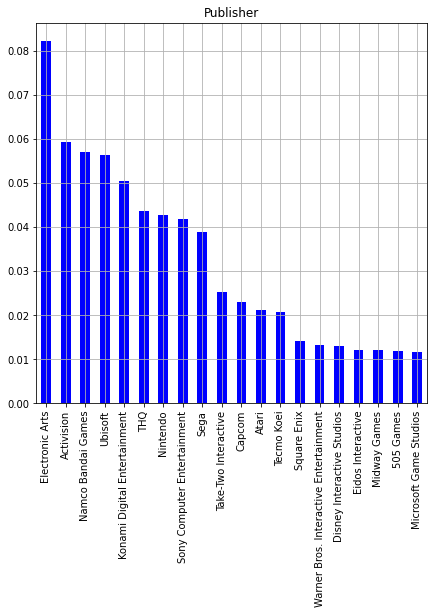

In [43]:
publisher = dataframe['Publisher'].value_counts()/sum(dataframe['Publisher'].value_counts())
print(publisher[:5])

plot_publisher = publisher[:20]
plot_publisher.plot.bar(title='Publisher', figsize=(7,7),grid=True,color='b')

Electronic Arts                0.163690
Nintendo                       0.110105
Activision                     0.080989
Sony Computer Entertainment    0.068021
Ubisoft                        0.061170
Name: Publisher, dtype: float64


<AxesSubplot:title={'center':'Popular Publisher'}>

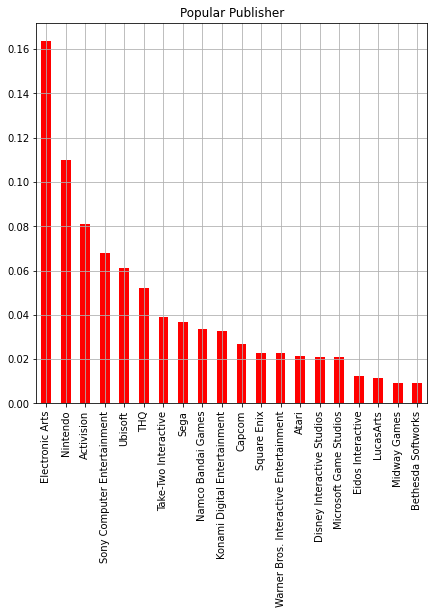

In [72]:
popular_publisher_data = popular_data['Publisher']
popular_publisher = popular_publisher_data.value_counts()/sum(popular_publisher_data.value_counts())
print(popular_publisher[:5])

plot_popular_publisher = popular_publisher[:20]
plot_popular_publisher.plot.bar(title='Popular Publisher',figsize=(7,7),grid=True,color='r')

In [75]:
diff_publisher = popular_publisher - publisher
diff_publisher = diff_publisher.dropna()
display_diff_publisher = diff_publisher[diff_publisher.abs() >= 1e-2]
print(display_diff_publisher)

Activision                      0.021692
Electronic Arts                 0.081497
Konami Digital Entertainment   -0.017732
Namco Bandai Games             -0.023443
Nintendo                        0.067382
Sony Computer Entertainment     0.026157
Take-Two Interactive            0.013858
Tecmo Koei                     -0.015365
Name: Publisher, dtype: float64


In [80]:
#predict
dataframe = dataframe.sort_values(by='Year')
year = dataframe['Year'].unique()
print(year)

[1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991.
 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003.
 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015.
 2016. 2017. 2020.]


In [137]:
train_sample = 26
label = []
for i, y in enumerate(year):
    annual_sales = dataframe.loc[dataframe['Year'] == y]['Global_Sales']
    #fliter small records
    if len(annual_sales) < 5:
        continue
    label.append(annual_sales.sum())
 
 
label = np.array(label)

print(label)

[ 11.38  35.77  28.86  16.79  50.36  53.94  37.07  21.74  47.22  73.45
  49.39  32.23  76.16  45.98  79.17  88.11 199.15 200.98 256.47 251.27
 201.56 331.47 395.52 357.85 414.01 458.51 521.04 609.92 678.9  667.3
 600.29 515.8  363.49 368.11 337.03 264.44  70.9 ]


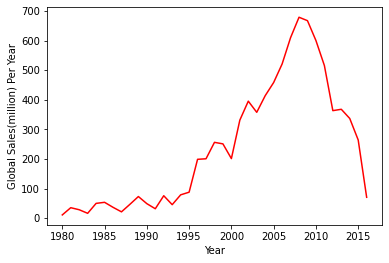

In [108]:
plt.plot(np.arange(0,len(label)),label,'r-')
plt.xticks(np.arange(0,len(label),5),[1980 + 5*i for i in range(8)],fontsize=10)
plt.xlabel('Year')
plt.ylabel('Global Sales(million) Per Year')
plt.show()


loss: 3771.98, a:0.49, b:0.99
loss: 3737.70, a:0.48, b:0.98
loss: 3708.88, a:0.47, b:0.97
loss: 3685.16, a:0.46, b:0.96
loss: 3666.18, a:0.45, b:0.95
loss: 3651.52, a:0.44, b:0.94
loss: 3640.75, a:0.43, b:0.93
loss: 3633.39, a:0.43, b:0.93
loss: 3628.94, a:0.42, b:0.92
loss: 3626.86, a:0.41, b:0.91
loss: 3626.62, a:0.41, b:0.91
loss: 3627.69, a:0.40, b:0.90
loss: 3629.55, a:0.40, b:0.90
loss: 3631.76, a:0.39, b:0.89
loss: 3633.95, a:0.39, b:0.89
loss: 3635.85, a:0.39, b:0.89
loss: 3637.26, a:0.39, b:0.89
loss: 3638.08, a:0.39, b:0.89
loss: 3638.28, a:0.39, b:0.89
loss: 3637.92, a:0.39, b:0.89
loss: 3637.06, a:0.39, b:0.89
loss: 3635.84, a:0.39, b:0.89
loss: 3634.39, a:0.39, b:0.89
loss: 3632.82, a:0.40, b:0.90
loss: 3631.28, a:0.40, b:0.90
loss: 3629.86, a:0.40, b:0.90
loss: 3628.65, a:0.41, b:0.91
loss: 3627.70, a:0.41, b:0.91
loss: 3627.04, a:0.41, b:0.91
loss: 3626.66, a:0.41, b:0.91
loss: 3626.53, a:0.42, b:0.92
loss: 3626.62, a:0.42, b:0.92
loss: 3626.86, a:0.42, b:0.92
loss: 3627

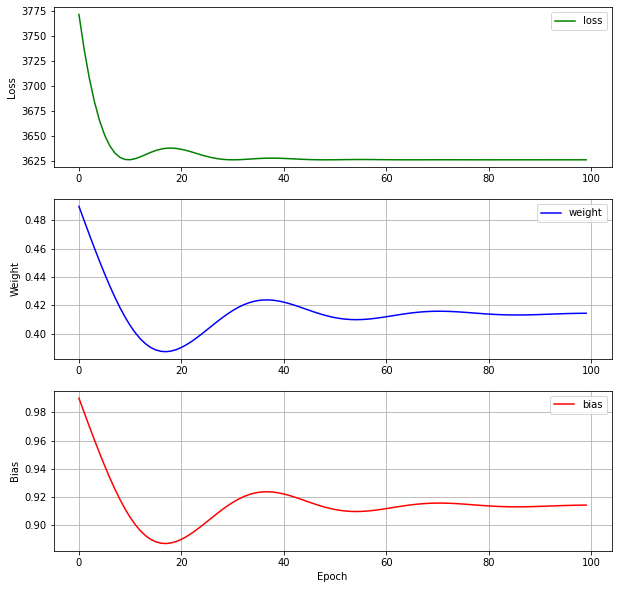

In [138]:
#model build
import torch
import torch.optim as optim
import torch.nn as nn

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

epoch = 100

class Model(nn.Module):
    def __init__(self,device=device):
        super(Model,self).__init__()
        self.weight = nn.Parameter(torch.tensor([0.5]),requires_grad=True)
        self.bias = nn.Parameter(torch.ones(1),requires_grad=True)
        self.device = device

    def forward(self,x):
        _, L = x.size()
        predict = torch.zeros(1,L).to(self.device)
        x0 = x[0][0]
        F = x0
        predict[0][0] = x0
        for i in range(L-1):
            F = self.weight * x0 + (1-self.weight)*F + self.bias * (x0 - F)
            predict[0][i+1] = F
            x0 = x[0][i+1]
        
        return predict

input_data = torch.FloatTensor(label).view(1,len(label)).to(device)
model = Model().to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr=1e-2)
losses = []
a = []
b = []

for i in range(epoch):
    predict = model(input_data)
    loss = criterion(predict,input_data)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('loss: {:.2f}, a:{:.2f}, b:{:.2f}'.format(loss.item(),model.weight.item(),model.bias.item()))
    losses.append(loss.item())
    a.append(model.weight.item())
    b.append(model.bias.item())

print(predict[0][-1])

plt.figure(0,figsize=(10,10))
plt.subplot(311)
plt.plot(np.arange(0,epoch),np.array(losses),'g-',label='loss')
#plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(312)
plt.plot(np.arange(0,epoch),np.array(a),'b-',label='weight')
#plt.xlabel('Epoch')
plt.ylabel('Weight')
plt.legend()
plt.grid(True)

plt.subplot(313)
plt.plot(np.arange(0,epoch),np.array(b),'r-',label='bias')
plt.xlabel('Epoch')
plt.ylabel('Bias')
plt.legend()
plt.grid(True)

plt.show()

In [140]:
#best parameter
weight = 0.41
bias = 0.91
last_predict = 245.63

def prediction_rule(w,b,p,data,L):
    x0 = data
    F = p
    predict = []
    for i in range(L):
        F = w*x0 + (1-w)*F + b*(x0 - F)
        predict.append(F)
        
    return predict

initial_point = label[-1]
print(initial_point)
predict = prediction_rule(weight,bias,last_predict,initial_point,5)
print(predict)

70.9
[14.986400000000003, 88.79235200000001, 65.17444736, 72.73217684480001, 70.313703409664]


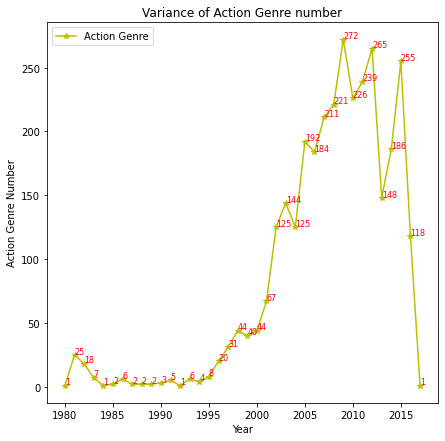

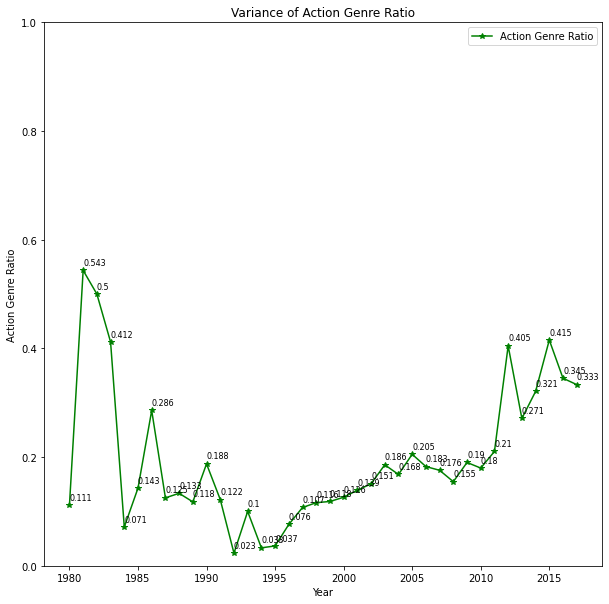

In [170]:
#time analysis
genre_per_year = []
genre_ratio_per_year = []

for i,y in enumerate(year):
    annual_genre = dataframe.loc[dataframe['Year'] == y]['Genre']
    genre_per_year.append(annual_genre.value_counts())
    genre_ratio_per_year.append(annual_genre.value_counts()/sum(annual_genre.value_counts()))

action_per_year = []
action_ratio_per_year = []
for series in genre_per_year:
    if 'Action' in series.keys():
        action_per_year.append(series['Action'])

for series in genre_ratio_per_year:
    if 'Action' in series.keys():
        action_ratio_per_year.append(series['Action'])

L = len(action_per_year)
plt.figure(1,figsize=(7,7))
plt.plot(np.arange(0,L),np.array(action_per_year),'y-*',label='Action Genre')
plt.ylabel('Action Genre Number')
plt.title('Variance of Action Genre number')
plt.xticks(np.arange(0,L,5),[y*5 + 1980 for y in range(8)],fontsize=10)
plt.xlabel('Year')
plt.legend()

for i in range(L):
    plt.text(i,action_per_year[i]+1,action_per_year[i],c='r',fontsize=8)

plt.figure(2,figsize=(10,10))
plt.plot(np.arange(0,L),np.array(action_ratio_per_year),'g-*',label='Action Genre Ratio')
plt.ylabel('Action Genre Ratio')
plt.xlabel('Year')
plt.title('Variance of Action Genre Ratio')
plt.legend()
plt.ylim(0,1)

for i in range(L):
    plt.text(i,action_ratio_per_year[i]+0.01,str(round(action_ratio_per_year[i],3)),c='k',fontsize=8)

plt.xticks(np.arange(0,L,5),[1980 + 5*y for y in range(8)],fontsize=10)
plt.show()

In [203]:
#Sales per genre in EU
grouped = dataframe.groupby(by=['Year','Genre']).sum()
grouped = grouped.reset_index()
#grouped
top_genre_sales_eu = []

for y in year:
    selected = grouped.loc[grouped['Year'] == y,['Genre','EU_Sales']]
    selected = selected.sort_values(by='EU_Sales',ascending=False)
    if len(selected) < 5:
        continue
    top_genre_sales_eu.append(selected)



In [230]:
#top five genre statistic
top_genre_hot_time = {}
for item in grouped['Genre'].unique():
    top_genre_hot_time[item] = {}


for y,frame in zip(year,top_genre_sales_eu):
    hot_genre = frame[:5]['Genre']
    for g in hot_genre.values:
        top_genre_hot_time[g][int(y)] = round(frame.loc[frame['Genre'] == g]['EU_Sales'].values[0],3)

top_genre_lifespan = {}
for item in grouped['Genre'].unique():
    top_genre_lifespan[item] = len(top_genre_hot_time[item])


df_life = pd.DataFrame(top_genre_lifespan.values(),index=top_genre_lifespan.keys(),columns=['LifeSpan'])
df_life


,LifeSpan
Action,35
Fighting,10
Misc,11
Shooter,27
Sports,29
Platform,23
Puzzle,9
Racing,23
Simulation,2
Adventure,4


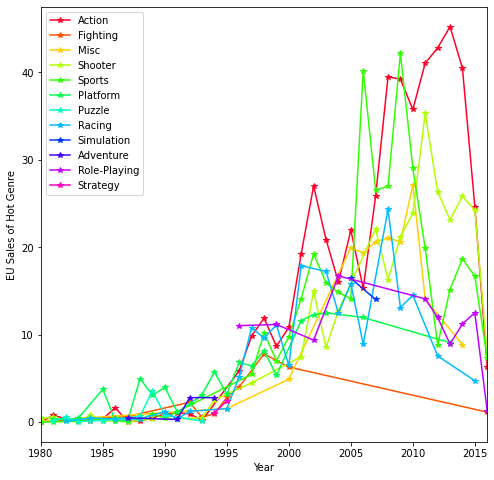

In [227]:
plt.figure(0,figsize=(8,8))
cmap = plt.get_cmap('gist_rainbow')
colors = [cmap(i) for i in np.linspace(0,1,len(grouped['Genre'].unique()))]

for i,item in enumerate(grouped['Genre'].unique()):
    plt.plot([k for k in top_genre_hot_time[item].keys()],[v for v in top_genre_hot_time[item].values()],'-*',c=colors[i],label=item)

plt.xlabel('Year')
plt.ylabel('EU Sales of Hot Genre')
plt.xlim(1980,2016)
plt.xticks(np.arange(1980,1980+L,5),[1980 + 5*y for y in range(0,8)],fontsize=10)
plt.legend()
plt.show()